# **Electrical Fault Prediction**
This model predicts if there will be a fault in the system based on the current and voltage in the transmission line.
The dataset used here is consist of **six parameter columns** and **one output column.**

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,roc_auc_score



# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [222]:
data = pd.read_excel("Dataset_2.xlsx")
data

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102410,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


# Data Analysis

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [224]:
data.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823452,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [225]:
data.shape

(12001, 7)

<AxesSubplot:>

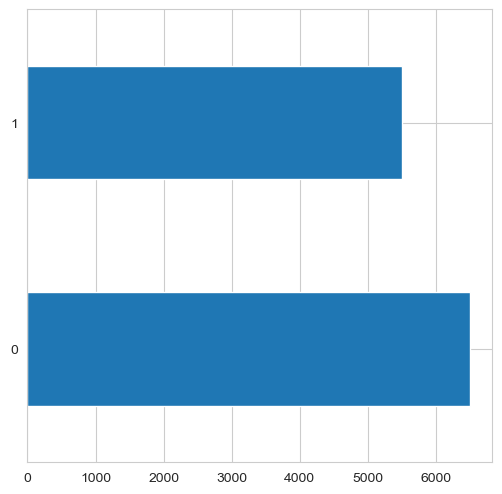

In [226]:
plt.figure(figsize=(6,6),dpi=100)
data["Output (S)"].value_counts().plot(kind='barh')

> As the dataset contains a good balance of 1 and 0's. So, we dont need to perform balancing on the dataset.

In [227]:
# pairplot
# sns.pairplot(data=data, hue="Va")

# Correlation Checking
This will help us understanding if any of the column is too much related to the other column.

<AxesSubplot:>

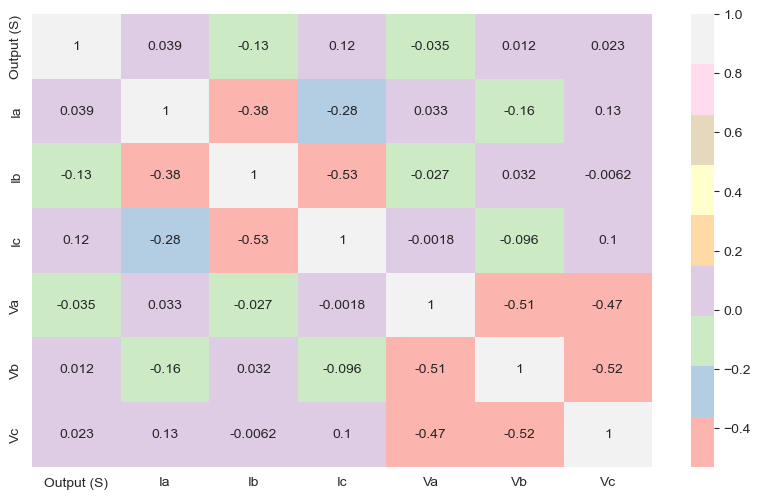

In [228]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(data.corr(),annot=True,cmap='Pastel1')

So, there is no correlation among the columns. Every column has an impact on the prediction.

In [229]:
data.dtypes

Output (S)      int64
Ia            float64
Ib            float64
Ic            float64
Va            float64
Vb            float64
Vc            float64
dtype: object

In [230]:
y =  data['Output (S)']
x = data.drop(["Output (S)"],axis=1)

# Outlier Treatment

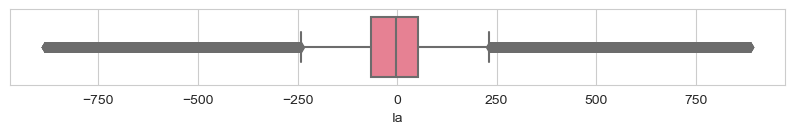

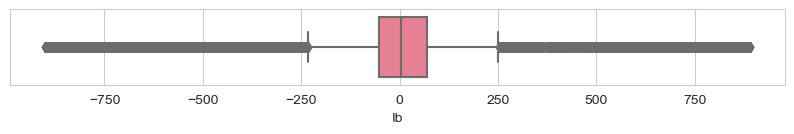

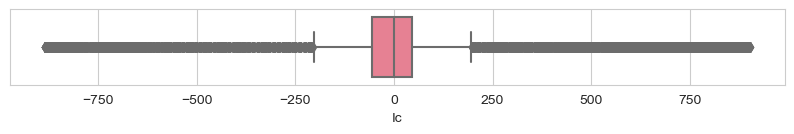

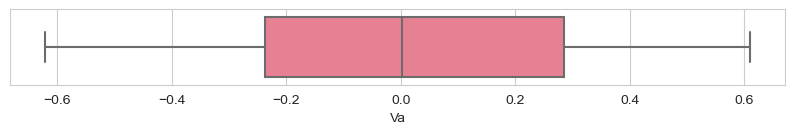

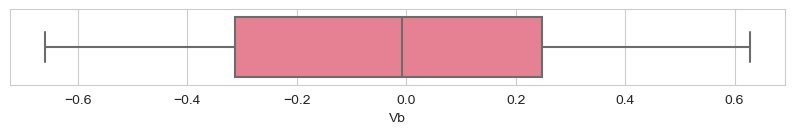

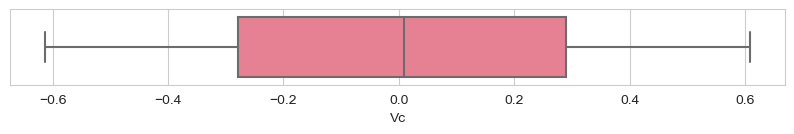

In [231]:
for i in x:
    plt.figure(figsize=(10,1),dpi=100)
    sns.boxplot(data=x,x=i,palette='husl')

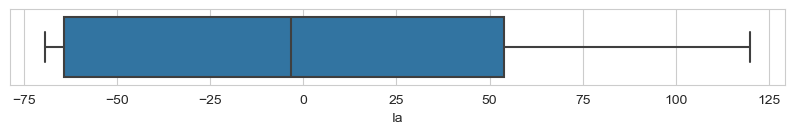

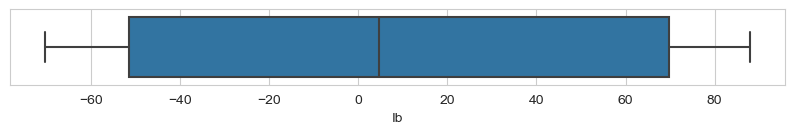

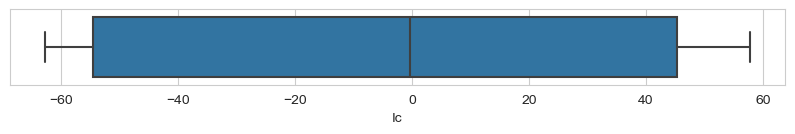

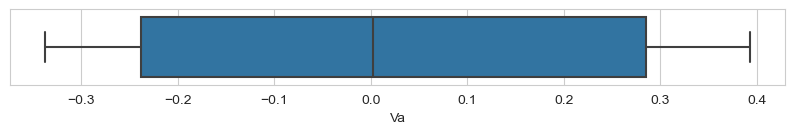

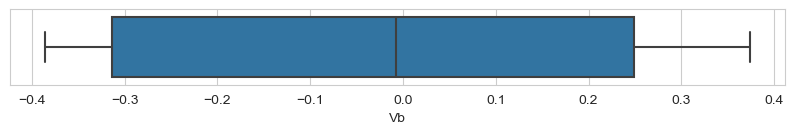

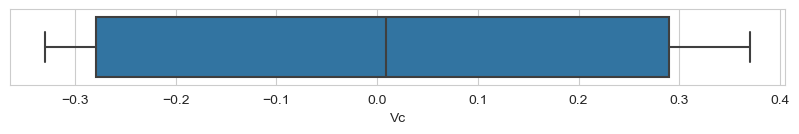

In [232]:
x = x.apply(lambda x: x.clip(lower = x.quantile(0.20),upper = x.quantile(0.82)))

for i in x:
    plt.figure(figsize=(10,1),dpi=100)
    sns.boxplot(data=x,x=i)

<AxesSubplot:>

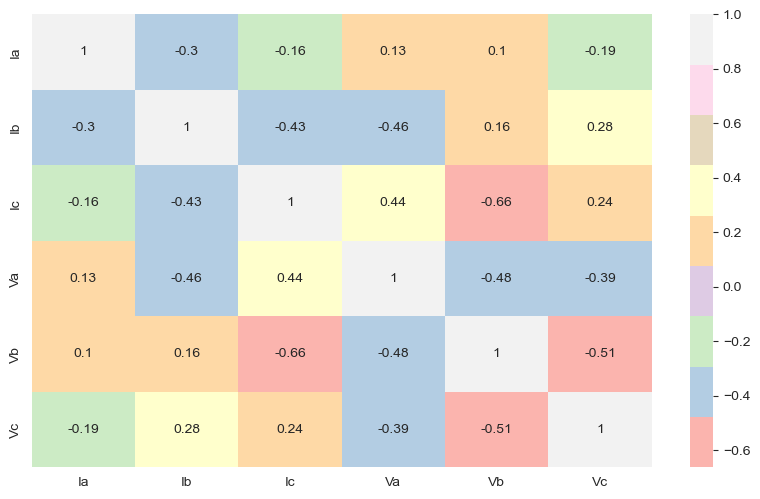

In [233]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(x.corr(),annot=True,cmap="Pastel1")

In [234]:
x.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,6.626900,8.298606,-2.766201,0.019216,-0.016071,0.011737
std,68.715563,60.051072,47.041783,0.261989,0.274881,0.261839
min,-69.267004,-70.282920,-62.760726,-0.337099,-0.385627,-0.329440
25%,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,53.823452,69.637787,45.274542,0.285078,0.248681,0.289681
max,119.841111,87.877718,57.774889,0.392626,0.373798,0.369998


In [235]:
# sns.pairplot(data=x,hue="Ia", diag_kind="hist")

# Dataset splitting into testing and training data

In [236]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=.75,random_state=1)

# Model Building

## 1. Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver="lbfgs", random_state=1)

In [238]:
logReg.fit(x_train,y_train)
y_pred_train = logReg.predict(x_train)
y_pred_test_lr = logReg.predict(x_test)

In [239]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      4871
           1       0.76      0.60      0.67      4129

    accuracy                           0.73      9000
   macro avg       0.74      0.72      0.72      9000
weighted avg       0.73      0.73      0.73      9000



In [240]:
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1634
           1       0.76      0.59      0.66      1367

    accuracy                           0.73      3001
   macro avg       0.73      0.72      0.72      3001
weighted avg       0.73      0.73      0.72      3001



## 2. KNN

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [242]:
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [243]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4871
           1       1.00      1.00      1.00      4129

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [244]:
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1634
           1       0.99      0.99      0.99      1367

    accuracy                           0.99      3001
   macro avg       0.99      0.99      0.99      3001
weighted avg       0.99      0.99      0.99      3001



## 3. XgBoost

In [245]:
import xgboost as  xgb

In [246]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, use_label_encoder =False)
xgb_model.fit(x_train,y_train)
y_pred_train = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

[02:24:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [247]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4871
           1       1.00      1.00      1.00      4129

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [248]:
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1634
           1       1.00      0.99      1.00      1367

    accuracy                           1.00      3001
   macro avg       1.00      1.00      1.00      3001
weighted avg       1.00      1.00      1.00      3001



## MLP (Multi Layer Perceptron)

In [249]:
from sklearn.neural_network import MLPClassifier

In [250]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train,y_train)
y_pred_train = mlp.predict(x_train)
y_pred_test_mlp = mlp.predict(x_test)

In [251]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4871
           1       0.98      0.94      0.96      4129

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



In [252]:
print(classification_report(y_test,y_pred_test_mlp))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1634
           1       0.98      0.93      0.95      1367

    accuracy                           0.96      3001
   macro avg       0.96      0.96      0.96      3001
weighted avg       0.96      0.96      0.96      3001



## *SHAP* For explanation

In [253]:
import shap

ModuleNotFoundError: No module named 'shap'

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(x)
shap.plots.waterfall(shap_values[0])

## Explaining SHAP figure
The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output.
Features pushing the prediction ***higher*** are shown in ***red***, those pushing the prediction ***lower*** are in ***blue***. Another way to visualize the same explanation is to use a ***force plot***

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

## ROC AUC Score and plots

In [254]:
lrAUC = roc_auc_score(y_test, y_pred_test_lr)
knnAUC = roc_auc_score(y_test,y_pred_test_knn)
xgbAUC = roc_auc_score(y_test, y_pred_test_xgb)
mlpAUC = roc_auc_score(y_test,y_pred_test_mlp)

In [255]:
# To create plots of ROC AUC scores
r_lr_fpr,r_lr_tpr,_ = roc_curve(y_test,y_pred_test_lr)
r_knn_fpr,r_knn_tpr,_ = roc_curve(y_test,y_pred_test_knn)
r_xgb_fpr,r_xgb_tpr,_ = roc_curve(y_test,y_pred_test_xgb)
r_mlp_fpr,r_mlp_tpr,_ = roc_curve(y_test,y_pred_test_mlp)

Text(0, 0.5, 'True Positive Rate')

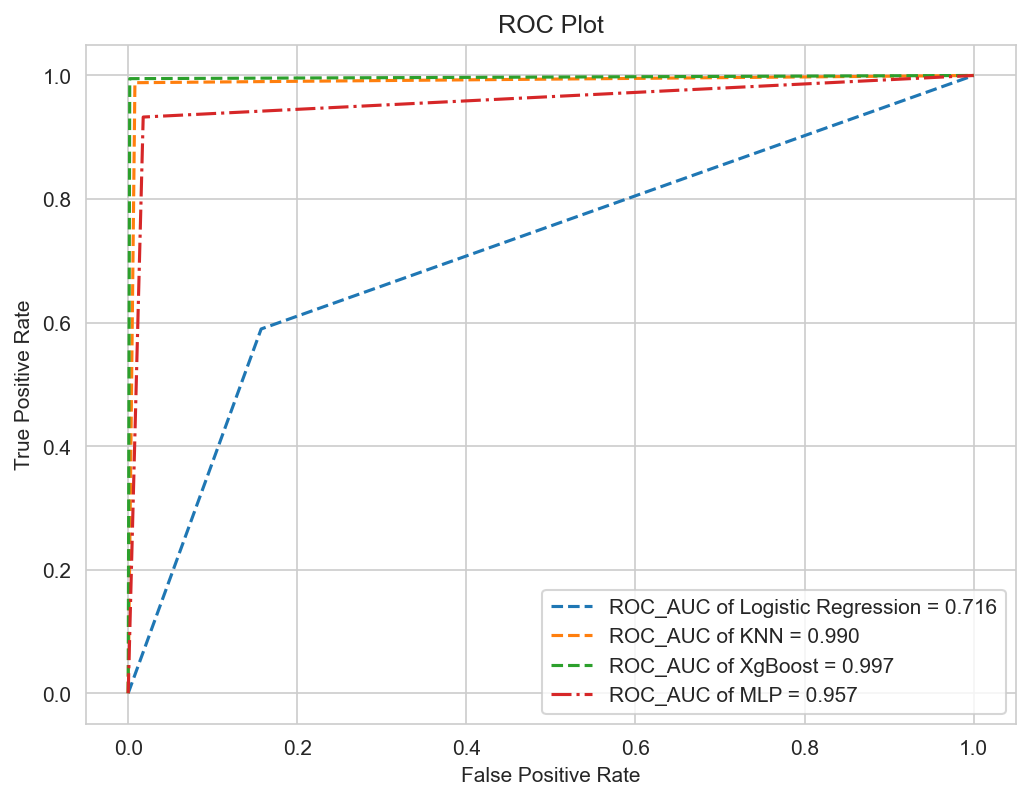

In [256]:
plt.figure(figsize=(8,6),dpi=150)

plt.plot(r_lr_fpr,r_lr_tpr,linestyle='--',label='ROC_AUC of Logistic Regression = %.3f' % lrAUC)
plt.plot(r_knn_fpr,r_knn_tpr,linestyle='--',label='ROC_AUC of KNN = %.3f' % knnAUC)
plt.plot(r_xgb_fpr,r_xgb_tpr,linestyle='--',label='ROC_AUC of XgBoost = %.3f' % xgbAUC)
plt.plot(r_mlp_fpr,r_mlp_tpr, linestyle='-.',label = 'ROC_AUC of MLP = %.3f' % mlpAUC)


plt.title('ROC Plot')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')